#  DS3000A/9000

# Final Exam – Part 2 (60 pts)

### Student Name: xxxxxxxx
### Student ID: xxxxxxxx

## General
This part of the exam is **Open Book** and you will answer to the programming questions below on this Jupyter Notebook. You have **2 hours (3:00 pm - 5:00 pm)** to finish the exam and upload your notebook on OWL. 
* You **are allowed** to use any document and sources on your computer and look up documents on the internet. **You need to cite any code that you use if it is NOT from the course Labs or Tutorial examples**.
* You or **NOT allowed** to share documents, or communicate in any other way with people inside/outside of the exam room during the final. Using AI chatbots is **NOT allowed and will be counted as cheating or plagiarism**.
* All Figures should have a x-axis and y-axis label.
* Add as many cells as you want, whenever you need to. 
* To finish the exam in the alloted time, you will have to work efficiently. You need to submit the exam Jupyter Notebook by the **due date (Dec 12, 2023 at 5:00 pm)** on **OWL in the Assignments / Final Exam - Part 2** where you downloaded the Dataset and Jupyter Notebook. **Late submission will be scored with 0 pts, unless you have received special accommodations. To avoid technical difficulties, start your submission at latest five to ten minutes before the deadline. To be sure, you can also submit multiple versions - only the latest version will be graded. 

**Ensure that your code runs correctly by choosing "Kernel -> Restart and Run All" before submitting.**

### Additional Guidance

If at any point you are not sure about the answer, then *write your assumptions clearly in your exam and proceed according to those assumptions.*

Good luck!

In [47]:
## Preliminaries
### YOU MAY ADD ADDITIONAL IMPORTS IF YOU WISH
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score
import time
import matplotlib.pyplot as plt 
%matplotlib inline

## Dataset
In this exam, we will work on the network anomaly detection dataset "IP_Activity_Dataset_5000.csv". It was generated from web server access logs and collected from a real-world website in Content Delivery Networks (CDNs). Each sample/row in the dataset represents a unique Internet Protocol (IP) address with 9 columns/variables. Each feature/column is a performance indicator that reflect the state or activity of each sample/IP. The IP addresses were masked due to privacy reasons.  

### Variables/Features
Feature description: 
1.	**requests**: the number of requests sent by per IP.
2.	**request-interval**:  the average time interval between consecutive requests sent by per IP. Unit: milliseconds
3.	**request-popularity**: what percentage of the requests sent by per IP are for popular contents.
4.	**bytes**: the average bytes received by per IP after requesting the content.
5.	**delivery-time**: the average request delivery time experienced by per IP. Unit: milliseconds
6.	**hit-rate**: cache hit rate of per IP.
7.	**nodes**: the number of nodes that received requests from per IP.
8.	**contents**: the number of contents/files that per IP requested for.
9.	**label**: 0-normal, 1-abnormal (potential cache pollution attacks). 

---
# Question 1 - Explore dataset ( X / 5 pts )

- Read the dataset "IP_Activity_Dataset_5000.csv" as a pandas dataframe.
- Print the number of observations in the dataset
- Print the number of variables in the dataset (all variables regardless of whether they are a feature or label or neither)
- Print the number of observations for each class in the 'label' variable
- Print the first five rows of the dataset

In [48]:
# 1 point
df = pd.read_csv('IP_Activity_Dataset_5000.csv')

# 1 point
# Prints the number of observations in the dataset
print('Number of observations: ', len(df))

# 1 point
# Prints the number of variables in the dataset
print('Number of variables: ', len(df.columns))

# 1 point
# Prints the number of observations for each class in the 'label' variable
print('Number of observations for each class in the label variable:')
print(df['label'].value_counts())

# 1 point
# Prints the first five rows of the dataset
df.head()

Number of observations:  5000
Number of variables:  9
Number of observations for each class in the label variable:
0    4500
1     500
Name: label, dtype: int64


,requests,request-interval,request-popularity,bytes,delivery-time,hit-rate,nodes,contents,label
0,18,378.605278,1.000000,29.667209,38.833333,0.888889,2,9,0
1,5,0.524200,1.000000,19.226953,204.600000,1.000000,1,5,0
2,1141,66.912231,0.167647,19.847204,142.072963,0.021520,5,703,1
3,80,2.472875,0.418750,1769.312634,1330.787500,1.000000,2,76,0
4,1,0.000000,1.000000,0.000000,2.000000,1.000000,1,1,0


---
---
# Question 2 - Regression and Evaluation (X / 20 pts)
Your next task is to build regression models that predicts the delivery-time of IPs.

---
## Question 2 Part A - Data Splitting For Regression ( X / 2 pts )
- Use 'delivery-time' as the target variable y for your regression models, and other variables as the feature set X.
- Split the data into equals-sized training and test sets (do not shuffle the data).


In [49]:
# 1 point
# Use 'delivery-time' as the target variable y for your regression models, and other variables as the feature set X.
X = df.drop('delivery-time', axis=1)
y = df['delivery-time']

# 1 point
# Split the data into equals-sized training and test sets (do not shuffle the data).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

---
## Question 2 Part B - Data Standardization ( X / 2 pts )
- Z-standarize the input features of the training and test sets.
- All the questions below should be based on the standarized dataset.

In [50]:
# 2 points
# Z-standarize the input features of the training and test sets.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---
## Question 2 Part C - Basic Lasso Regression ( X / 4 pts )
- Build a regression model with L1 regularization (Lasso) and the default alpha value. Fit it on your training set, and set the random state to 42.
- Report the coefficients and intercept of the model.
- Report the Root Mean Square Error (RMSE) to evaluate the testing performance of your model.

In [51]:
# 1 point
lasso = Lasso(random_state = 42)
lasso.fit(X_train, y_train)

# 1 point
print('Coefficients: ', lasso.coef_)
print('Intercept: ', lasso.intercept_)

# 2 points
y_pred_lasso = lasso.predict(X_test)
print('Lasso RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Coefficients:  [  10.17733701   18.59594951  103.74664627 5222.06671709 -138.53886518
  -26.9272339   328.28445291 -528.78077484]
Intercept:  522.2855513716036
Lasso RMSE:  2342.731628197046


---
## Question 2 Part D - Determine the Optimal Regularization Term ( X / 12 pts )
- Perform Lasso Regression with 5-fold cross-validation on the training set to find and **print out** the optimal regularization parameter (alpha) value. Vary the regularization parameter (alpha) between 0.01 and 100, evenly spaced in log-space, and generate 100 values. Set the random state to 42. Tip: use LassoCV function.
- Create a plot showing the relationship between these 100 alpha values and their corresponding mean RMSE values. Sets the scale of the x-axis to a logarithmic scale. 
- Build and fit a Lasso Regression model on the training set using the optimal alpha and a random state of 42. Report the coefficients and intercept of the model. Report the Root Mean Square Error (RMSE) to evaluate the testing performance of your model.

Optimal alpha value: 8.111308307896872


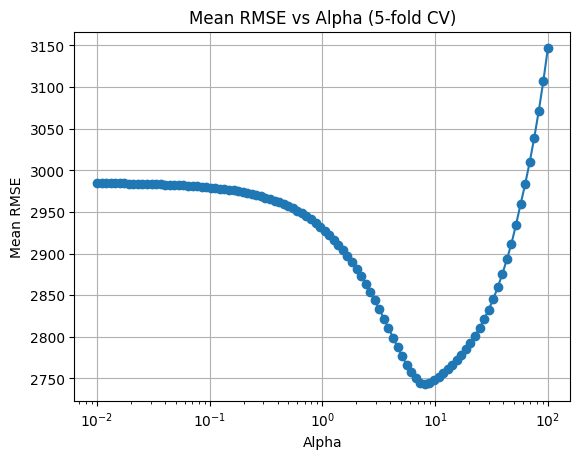

In [52]:
# 1 point
# Define the search space of alpha
# all the following alpha value generation code are acceptable
# alphas = np.logspace(-2, 2, 100)
# alphas = np.logspace(np.log10(0.01), np.log10(100), num=100)
# alphas = np.exp(np.linspace(np.log(0.01),np.log(100),100))
alphas = np.geomspace(0.01,100,100)

# 2 points
# Apply Lasso Regression with 5-fold cross-validation (they can also
# use other CV functions,like cross_validate(lasso, X_train, y_train, cv=5))
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

# 1 point
# Determine and report the optimal alpha value
optimal_alpha = lasso_cv.alpha_
print("Optimal alpha value:", optimal_alpha)

# 2 points
# Create a plot of alpha values vs. mean MSE
# Calculate mean RMSE for each alpha
mean_rmse = np.sqrt(np.mean(lasso_cv.mse_path_, axis=1))
plt.figure()
plt.plot(lasso_cv.alphas_, mean_rmse, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean RMSE')
plt.title('Mean RMSE vs Alpha (5-fold CV)')
plt.xscale('log') 
plt.grid()
plt.show()

In [53]:
# 2 points
lasso_optimal = Lasso(alpha = optimal_alpha, random_state = 42)
lasso_optimal.fit(X_train, y_train)

# 2 points
print('Coefficients: ', lasso_optimal.coef_)
print('Intercept: ', lasso_optimal.intercept_)

# 2 points
y_pred_lasso_optimal = lasso_optimal.predict(X_test)
print('Lasso RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_lasso_optimal)))

Coefficients:  [ 0.00000000e+00  9.80979380e+00  8.45399253e+01  5.21093772e+03
 -1.12052875e+02 -4.86181219e+00  3.09342072e+02 -5.16502916e+02]
Intercept:  522.2855513716036
Lasso RMSE:  2341.008950213638


---
---
# Question 3 - Classification and Evaluation (X / 35 pts)
Your next task is to build classification models that can identify the malicious attacker IPs.

---
## Question 3 Part A - Data Splitting For Classification ( X / 2 pts )
- Use 'label' as the target variable y for your classification models for abnormal IP detection, and other variables as the feature set X.
- Split the data into equals-sized training and test sets, and ensure the balanced distribution of labels when splitting data.

In [54]:
# 1 point
# Use 'label' as the target variable y for your classification models, and other variables as the feature set X.
X = df.drop('label', axis=1)
y = df['label']

# 1 point
# Split the data into equals-sized training and test sets (do not shuffle the data).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

---
## Question 3 Part B - Data Standardization ( X / 2 pts )
- Z-standarize the input features of the training and test sets.
- All the questions below should be based on the standarized dataset.

In [55]:
# 2 points
# Z-standarize the input features of the training and test sets.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---
## Question 3 Part C - Random Forest ( X / 5 pts )
- Build a Random Forest model that consists of 5 base decision trees with the maximum depth of 5, and fit the training set. Set random state to 42.
- Print out the accuracy, F1-score, confusion matrix, and execution time (including both training and testing time) of the model when evaluating the testing performance of your model.


In [56]:
# 2 points
rf = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=42)

# 3 points
t1=time.time()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
t2=time.time()
print('Accuracy: ', rf.score(X_test, y_test))
print('F1-score: ', f1_score(y_test, y_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Execution time: ', t2-t1)

Accuracy:  0.9932
F1-score:  0.96579476861167
Confusion matrix: 
 [[2243    7]
 [  10  240]]
Execution time:  0.019367694854736328


---
## Question 3 Part D - Feature Selection by Random Forest ( X / 14 pts )
- Use the Random Forest model you built in Q3-C to generate feature importance scores and select the most important features (rank the importance scores of each feature in descending order, and only select the important features from most to least important until the accumulated relative importance score reaches 90% or 0.9).
- Use a horizontal bar chart to plot the importance scores of all features in descending order. Add appropriate x-axis and y-axis labels.
- Print out the selected features with their importance scores, and generate the new training and test sets with the new feature set. 
- Retrain the same Random Forest model from Q3-C on the new training set, and print out the accuracy, F1-score, confusion matrix, and execution time (including both training and testing time) of the model on the new test set.
- Plot the ROC curve for evaluating the Random Forest model on the new test set and report the area under the ROC curve.

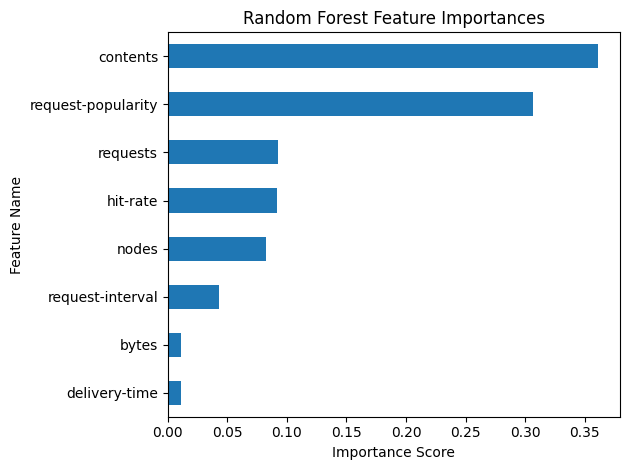

-----------------------------------------------
Selected features:
contents (0.361612)
request-popularity (0.306835)
requests (0.092525)
hit-rate (0.091732)
nodes (0.082639)
-----------------------------------------------
Accuracy:  0.996
F1-score:  0.9799196787148594
Confusion matrix: 
 [[2246    4]
 [   6  244]]
Execution time:  0.009582757949829102
-----------------------------------------------


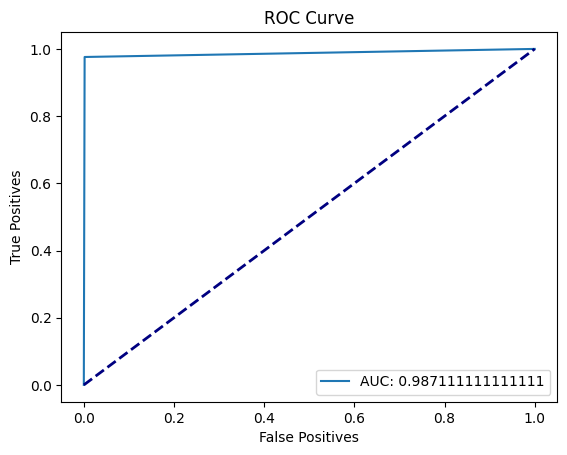

The area under the ROC curve is  0.987111111111111


In [57]:
# 1 point
# Get feature importances and sort them in descending order
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# 2 points
# Select only the important features until accumulated importance reaches 90%
importance_sum = 0.0
selected_indices = []
for i in range(X.shape[1]):
    importance_sum += feature_importances[indices[i]]
    selected_indices.append(indices[i])
    if importance_sum >= 0.9:
        break

# 2 points
# Use a horizontal bar chart to plot the importance scores of all features in descending order. Add appropriate x-axis and y-axis labels.
feature_names = X.columns
f_importances = pd.Series(rf.feature_importances_, index=feature_names).sort_values()
ax = f_importances.plot.barh()
ax.set_title("Random Forest Feature Importances")
ax.set_xlabel("Importance Score")
ax.set_ylabel("Feature Name")
ax.figure.tight_layout()
plt.show()

# 1 point
# Print the selected features
print("-----------------------------------------------")
print("Selected features:")
for i in selected_indices:
    print("%s (%f)" % (feature_names[i], feature_importances[i]))

# 1 point
# Generate new training and test sets with the new feature set
X_train_selected = X_train[:, selected_indices]
X_test_selected = X_test[:, selected_indices]

# 4 points
# Retrain the same RF model on the new training set, and print out the accuracy, F1-score, confusion matrix, and execution time (including both training and testing time) of the model on the new test set
print("-----------------------------------------------")
t1=time.time()
rf.fit(X_train_selected, y_train)
y_pred = rf.predict(X_test_selected)
t2=time.time()
print('Accuracy: ', rf.score(X_test_selected, y_test))
print('F1-score: ', f1_score(y_test, y_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Execution time: ', t2-t1)

# 2 points
# Plot the ROC curve for evaluating the model on the test set.
print("-----------------------------------------------")
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
fig3 = plt.figure(num=3)
plt.plot(fpr, tpr, label = 'AUC: ' + str(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc=4)
plt.xlabel('False Positives')
plt.ylabel('True Positives')
plt.title('ROC Curve')
plt.show()

# 1 point
# Report AUC
print('The area under the ROC curve is ', roc_auc)

---
## Question 3 Part E - Hyperparamete Tuning of Random Forest ( X / 8 pts )
- Use 3-fold grid search to tune two hyperparameters for the Random Forest model you built in Q3-D:
    - The number of base estimators/decision trees (find the better value among the two numbers 10 and 20).
    - The maximum tree depth (find the better value among the two numbers 10 and 20).
- Print out the detected better hyperparameter values and cross-validation score.
- Build the Random Forest model with the better hyperparameter values you found, and fit the new training set from Q3-D.
- Report the accuracy, F1-score. confusion matrix, and execution time (including both training and testing time) of the model when evaluating the testing performance of your model on the new test set from Q3-D.


In [58]:
# 3 points
# Use 3-fold grid search to find the best hyperparameters for the Random Forest model you built in the previous question.
param_grid = {'n_estimators': [10, 20], 'max_depth': [10, 20]}
grid = GridSearchCV(rf, param_grid, cv=3)
grid.fit(X_train_selected, y_train)

# 1 point
# Print out the detected better hyperparameter values and cross-validation score.
print('Best parameters: ', grid.best_params_)
print('Best cross-validation score: ', grid.best_score_)

Best parameters:  {'max_depth': 10, 'n_estimators': 20}
Best cross-validation score:  0.9967996791042557


In [59]:
# 2 points
# Build the Random Forest model with the better hyperparameter values you found in the previous
# question, and fit the training set.
rf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)
t1=time.time()
rf.fit(X_train_selected, y_train)
y_pred = rf.predict(X_test_selected)
t2=time.time()

# 2 points
# Report the accuracy, F1-score. confusion matrix, and execution time (including both training and testing time)
# of the model when evaluating the testing performance of your model.
print('Accuracy: ', rf.score(X_test_selected, y_test))
print('F1-score: ', f1_score(y_test, y_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Execution time: ', t2-t1)

Accuracy:  0.9964
F1-score:  0.9818913480885312
Confusion matrix: 
 [[2247    3]
 [   6  244]]
Execution time:  0.033200979232788086


---
## Question 3 Part F - Classification Model Performance Discussion ( X / 4 pts )
- Compare the performance of the three models from Questions 3-C, 3-D, and 3-E, and discuss reasons for performance difference.
- Compare the execution time of the three models from Questions 3-C, 3-D, and 3-E, and discuss reasons for time/efficiency difference.

In [60]:
# These text questions don't have fix answers. Give full marks as long as the discussion/analysis make sense.

In [61]:
# 2 points: 1 point for comparing the performance of the models and 1 point for discussing reasons. 

#### Written answer: Explain here.
The results showed that Model 3-E outperformed Model 3-D in terms of accuracy and F1 score, while Model 3-D outperformed Model 3-C. This indicates that feature selection and hyperparameter tuning can improve the performance of RF models.

The improvement in Model 3-D can be attributed to the fact that feature selection helps to remove irrelevant features and noise from the data, which can improve the performance of the model. The improvement in Model 3-E can be attributed to the fact that hyperparameter tuning helps to find the optimal values of the hyperparameters to build an optimized or better model, which can further improve the performance of the model.


In [62]:
# 2 points: 1 point for comparing the performance of the models and 1 point for discussing reasons. 

#### Written answer: Explain here.
In this scenario, the execution time of Model 3-E was slightly higher than Model 3-C, while the execution time of Model 3-C was slightly higher than Model 3-D.

The reason why Model 3-E has a higher execution time than Model 3-C can be attributed to the fact that Model 3-E has a higher number of estimators (n_estimators) and higher max_depth due to hyperparameter tuning, which can increase the model complexity and hence increase the execution time.

The reason why Model 3-C has a higher execution time than Model 3-D can be attributed to the fact that Model 3-C does not use feature selection, so it has to process all the features in the data, which can increase the computational complexity and hence increase the execution time.

---
---
---
**You're done! As always, double-check your work by re-running the notebook from scratch.**